<a href="https://colab.research.google.com/github/natepuppy/CS472/blob/master/Nathanclark_hough_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proejct 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">2:00</span>
* A2. Gradient Orientation: <span style="color:red;">1:00</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">4:00</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">10 Min</span>
* B. Hough Transform (Circles):  <span style="color:red;">15:00</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

In [ ]:
# imports
%pylab inline
import numpy as np # this is so that you can see which functions come from the numpy library
import matplotlib.pyplot as plt # this is so that you can see which functions come from the pyplot library
import cv2
import copy
# from scipy import misc

# read in images
white_box_image = cv2.imread('2D_White_Box.png')
blocks_image = cv2.imread('blocks.png')
circles_image = cv2.imread('circles.png')
simple_circle_image = cv2.imread('simplecircle.png')

image_to_use = circles_image

Populating the interactive namespace from numpy and matplotlib


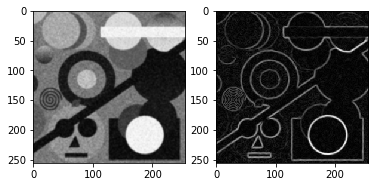

In [ ]:
# Part 1. Compute the Gradient Magnitude

def gradient_magnitude(image, threshold=-0.00001):
  # create sobel kernels
  kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
  kernel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

  # run convolutions
  x = cv2.filter2D(image, cv2.CV_64F, kernel_x) #when -1, the output image will have the same depth(data type) as the source. 
  y = cv2.filter2D(image, cv2.CV_64F, kernel_y) #input image is uint8 but output image contains positive and negative values, so trying to unproparly cast, we have to set it signed float value here.

  # x = np.where(x < threshold, 0, x)
  # y = np.where(y < threshold, 0, y)

  #Pythagoras theorem to calcurate magnitude of vector
  out_image = np.sqrt(np.square(x) + np.square(y)) 

  #min-max normalization to
  gradient_magnitude_image = (out_image - np.amin(out_image)) / (np.amax(out_image) - np.amin(out_image))*255 

  # display
  plt.subplot(121)
  plt.imshow(image, cmap="gray", vmin=0, vmax=255)
  plt.subplot(122)
  plt.imshow(gradient_magnitude_image, cmap="gray", vmin=0, vmax=255)

  return image, gradient_magnitude_image, x, y


# define the threshold, and choose the image
threshold = -0.0001
image = image_to_use

# turn it to grayscale and blur it
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(image, (5,5), 0)

image, gradient_magnitude_image, x, y = gradient_magnitude(image, threshold)

# Save the image
# cv2.imwrite('gradient_magnitude_image.png', gradient_magnitude_image)


<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

[ -90.         -147.52880771 -146.00354085  -23.19859051   10.88552705
   25.906508     35.21759297   31.23921489   25.94229549    1.97493401
  -64.85521437 -106.23235066 -123.87081071 -109.093492    -39.80557109
  -28.11320888  -70.70995378 -142.76516602 -135.          -59.74356284
  -80.83765295 -106.50436138  -91.68468432  -79.9920202   -77.47119229
    5.19442891   -6.34019175 -156.80140949 -158.45902408 -154.98310652
 -167.27564431  173.99099404 -163.44292862 -105.2551187   -61.85839877
  -41.0090869   -40.36453657  -69.44395478  -90.          -84.61068824
  -81.86989765  -79.87532834  -85.74616356  -92.91083783  -86.51672853
  -79.87532834  -93.17983012 -112.38013505 -122.00538321 -125.75388725
 -120.96375653 -108.43494882 -103.92834194 -115.55996517 -132.51044708
 -137.6025622   -90.           19.98310652   29.475889     38.51692631
   83.92754359  130.03025927  107.02052561   49.86451444   55.88552705
   82.2664019    83.29016319   74.57783868   72.18111109   64.53665494
   30.

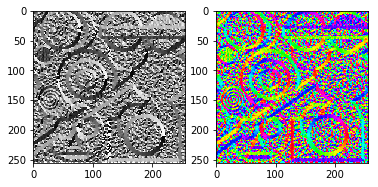

In [ ]:
# Part 2. Compute the Gradient Orientation  # atan2(dy,dx)

def compute_orientation(x, y):
  gray_orientation = np.arctan2(y, x) * 180 / np.pi
  # orientation = np.where(orientation < 0.5, 0, orientation)
  color_orientation = gray_orientation - np.pi + np.pi

  # Show your results on the blocks image
  plt.subplot(121)
  plt.imshow(gray_orientation,cmap="gray",vmin=-180,vmax=180)
  plt.subplot(122)
  plt.imshow(color_orientation,cmap="hsv",vmin=-180,vmax=180)

  return gray_orientation, color_orientation 

gray_orientation, color_orientation = compute_orientation(x, y)


print(color_orientation[65])

# Save the image
# cv2.imwrite('color_orientation.png', color_orientation)

<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



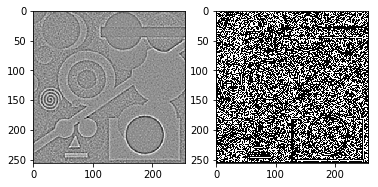

In [ ]:
# Part 3. Find the Zero Crossings

def zero_crossings(image):
  # create laplacian kernel
  laplacian_kernel = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]], np.float32)

  # run convolution
  image = cv2.filter2D(image, cv2.CV_64F, laplacian_kernel)

  # get width, height, and then duplicate the image with all zeros
  width, height = image.shape
  updated_image = np.zeros(image.shape)

  for i in range(1, width - 1):
    for j in range(1, height - 1):
      # check if it does from positive to negative
      if image[i][j] * image[i - 1][j] < 0: 
        updated_image[i][j] = 255
      elif image[i][j] * image[i][j - 1] < 0:
        updated_image[i][j] = 255


  # Show the results on blocks image
  plt.subplot(121)
  plt.imshow(image,cmap="gray",vmin=np.min(image),vmax=np.max(image))
  plt.subplot(122)
  plt.imshow(updated_image,cmap="gray",vmin=0,vmax=1)

  return image, updated_image



# Choose the image
image = image_to_use

# turn it to grayscale and blur it
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(image, (5,5), 0)
# image = cv2.GaussianBlur(image, (3,3), 0)

# call zero_crossings function
image, zero_crossing_image = zero_crossings(image)

# Save the image
# cv2.imwrite('zero_crossing_image.png', zero_crossing_image)


<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


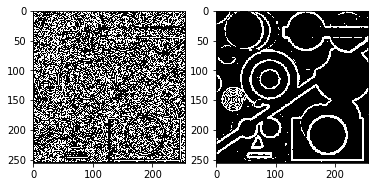

In [ ]:
# convert the zero_crossing_image and the gradient_magnitude_image to 0/255 images
def convert_to_0_255(zero_crossing_image, gradient_magnitude_image):
  threshold1 = 1
  threshold100 = 40
  zero_crossing_image_BW = np.where(zero_crossing_image < threshold1, 0, 255)
  gradient_magnitude_image_BW = np.where(gradient_magnitude_image < threshold100, 0, 255)
  return zero_crossing_image_BW, gradient_magnitude_image_BW

zero_crossing_image_BW, gradient_magnitude_image_BW = convert_to_0_255(zero_crossing_image, gradient_magnitude_image)

plt.subplot(121)
plt.imshow(zero_crossing_image_BW,cmap="gray",vmin=np.min(zero_crossing_image_BW),vmax=np.max(zero_crossing_image_BW))
plt.subplot(122)
plt.imshow(gradient_magnitude_image_BW,cmap="gray",vmin=np.min(gradient_magnitude_image_BW),vmax=np.max(gradient_magnitude_image_BW))


True

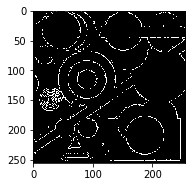

In [ ]:
# Part 4. Final Solution

def get_final_solution(zero_crossing_image, gradient_magnitude_image):
  zero_crossing_image_BW, gradient_magnitude_image_BW = convert_to_0_255(zero_crossing_image, gradient_magnitude_image)
  final_solution = zero_crossing_image_BW * gradient_magnitude_image_BW
  return final_solution

final_solution = get_final_solution(zero_crossing_image, gradient_magnitude_image)

# Show the results on blocks image
plt.subplot(121)
plt.imshow(final_solution,cmap="gray",vmin=np.min(final_solution),vmax=np.max(final_solution))
cv2.imwrite('final_solution.png', final_solution)


##### Part A: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>

The edge detection was very difficult until I understood it, then it turned out to be pretty straight-forward. For the gradient_magnitude function, I simply turned image to grayscale and blurred it, created sobel kernals, ran convolutions, used the pythagorean theorem to get the magnitude of the vectors, and normalized. This may seem like a lot, but I figured it out fairly quickly. I do not have any questions about this. 

Second, the gradient orientation was extremely simple. It was only calculating the arctan at each pixel, then readjusting the angles by using 180 and np.pi. I don't have any questions here. 

Third, the zero crossings were the most difficult part for me. I couldn't figure out how to calculate whether it goes from postive to negative very easily. I got some help from Suguru however, and it was very simple. I don't have any questions here.

Lastly, the get_final_solution was super simple, I just added the zero crossing and gradient magnitude images together. My only question here is would it be better to weight these pictures in certain ways to get thicker/more defined edges?







<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

In [ ]:
# create stamps

def create_stamp(radius):
  # create base image
  image = np.zeros((radius * 2 + 3, radius * 2 + 3, 3), np.uint8) # , dtype=uint8

  # Center coordinates
  center = int((radius * 2 + 3) / 2)
  center_coordinates = (center, center)

  # Color in BGR
  color = (1, 1, 1)  # almost black  # 68, 1, 84     # 170, 219, 50    # #440154   # #AADB32
    
  # Line thickness of 2 px
  thickness = 1
    
  # Draw a circle with blue line borders of thickness of 2 px
  image = cv2.circle(image, center_coordinates, radius, color, thickness)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  return image

stamp32 = create_stamp(16)
stamp64 = create_stamp(32)
stamp96 = create_stamp(48)

stamp = {16:stamp32, 32:stamp64, 48:stamp96}


def draw_circle(radius, image, row, col):
  # Color in BGR
  color = (227, 245, 66)  # almost black  # 68, 1, 84     # 170, 219, 50    # #440154   # #AADB32
    
  # Line thickness of 2 px
  thickness = 2
    
  # Draw a circle with blue line borders of thickness of 2 px
  image = cv2.circle(image, (row, col), radius, color, thickness)

  return image


In [ ]:
def convert_to_color(image, color):
  if color > 2:
    return image

  import copy   
  copy_image = copy.deepcopy(image) 
  shape = copy_image.shape

  for i in range(shape[0]):
    for j in range(shape[1]):
      copy_image[i][j][(color - 1) % 3] = 0
      copy_image[i][j][(color + 1) % 3] = 0
  return copy_image

In [ ]:
# create accumulator
def accumulator(edges, radius):
  white_points = np.argwhere(edges > 0)  # get all points that are white
  height, width = edges.shape # get the shape of the image # (256, 256)
  accumulation = np.zeros((height + 2 * radius + 2, width + 2 * radius + 2)) # add the buffer room to the accumulator  # (256, 256) to (290, 290)  -- # can change
  counter = 0.2
  if radius == 32:
    counter = 1.5

  for row, col in white_points:   # for every white point
      accumulation[(row) : (row + 2 * radius + 3), (col): (col + 2 * radius + 3)] += stamp[radius]
      if height - row <= radius or height - row >= height - radius or width - col <= radius or width - col >= width - radius:
        accumulation[(row) : (row + 2 * radius + 3), (col): (col + 2 * radius + 3)] += stamp[radius] * counter
  return accumulation


# delete big clusters of edges
def delete_condensed_edges(image):
  image_copy = copy.deepcopy(image) 
  white_points = np.argwhere(image > 0)  # get all points that are white
  height, width = image.shape # get the shape of the image # (256, 256)
  size_of_condensed_points = 13

  # for every white point
  for row, col in white_points:
    count = 0
    for i in range(row - size_of_condensed_points, row + size_of_condensed_points):
      for j in range(col - size_of_condensed_points, col + size_of_condensed_points):
        if i < 0 or j < 0 or i >= height or j >= width:
          continue
        if image_copy[i][j] > 0:
          count += 1
    if count > (size_of_condensed_points ** 2) / 2:
      image[row][col] = 0
  return image


# delete straight edges
def delete_straight_edges(image):
  image_copy = copy.deepcopy(image) 
  white_points = np.argwhere(image > 0)  # get all points that are white
  height, width = image.shape # get the shape of the image # (256, 256)
  size_of_condensed_points = 7

  # for every white point
  for row, col in white_points:
    count = 0
    for i in range(row - size_of_condensed_points, row + size_of_condensed_points):
      if i < 0 or i >= height:
        continue
      if image_copy[i][col] > 0:
        count += 1
    if count > (size_of_condensed_points * 2) / 1.5:
      image[row][col] = 0

    count = 0
    for j in range(col - size_of_condensed_points, col + size_of_condensed_points):
      if j < 0 or j >= width:
        continue
      if image_copy[row][j] > 0:
        count += 1
    if count > (size_of_condensed_points * 2) / 1.5:
      image[row][col] = 0

  return image



# find the center points
def find_centers(image, threshold):
  accumulation = copy.deepcopy(image) 
  center_points = []
  x = 0

  while True:
    if x >= threshold:
      break

    index = numpy.unravel_index(np.argmax(accumulation), accumulation.shape)
    shape = accumulation.shape
    square_size = 10

    center_points.append((index))

    # print(accumulation[index[0]][index[1]])   # height + 2 * radius + 2  256 - 290

    for i in range( index[0] - square_size,  index[0] + square_size):
      for j in range( index[1] - square_size, index[1] + square_size ):
        if i < 0 or j < 0 or i >= shape[0] or j >= shape[0]:
          continue
        accumulation[i][j] = 0

    x += 1

  return accumulation, center_points


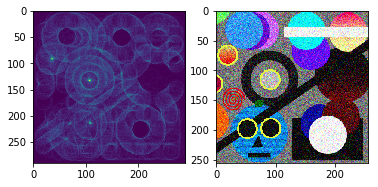

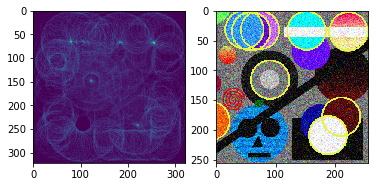

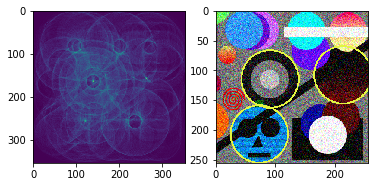

In [ ]:
radii = [16, 32, 48]
thresholds = [5, 9, 3]
actual_thresholds = [68, 51, 222]
color_schemes = ["red", "green", "blue", "gray"]  # red=0   green=1   blue=2
all_accummulation_maps = []


def hough_transform(image, radius, color):
    color_channel_image = convert_to_color(image, color)
    gray_image = cv2.cvtColor(color_channel_image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5,5), 0)

    # Get the gradient_magnitude_image, zero_crossing_image, and combine them to get edges_image
    _, gradient_magnitude_image, x, y = gradient_magnitude(blurred_image)
    _, zero_crossing_image = zero_crossings(blurred_image)
    edges_image = get_final_solution(zero_crossing_image, gradient_magnitude_image)

    # Delete the big clusters (the spiral)
    deleted_edges = delete_condensed_edges(edges_image)
    deleted_edges_2 = delete_straight_edges(deleted_edges)

    # get accumulation and add it to the list
    accumulation_map = accumulator(deleted_edges_2, radius=radii[radius])
    map_deleted_center, center_points = find_centers(accumulation_map, thresholds[radius])

    return edges_image, accumulation_map, map_deleted_center


all_final_images = []

for radius in range(len(radii)):
  final_accum = []
  for i in range(len(color_schemes)):
    if radius == 1:
      if i == 1 or i == 2 or i == 3:
        continue
    image = cv2.imread('circles.png')
    edges, accum1, accum2 = hough_transform(image, radius, i)
    if len(final_accum) == 0:
      final_accum = accum1
    else:
      final_accum += accum1

  accum1 = final_accum
  accum2, center_points = find_centers(final_accum, thresholds[radius])

  actual_center_points = []
  for i in range(len(center_points)):
    p1 = center_points[i][0] - 1 - radii[radius]
    p2 = center_points[i][1] - 1 - radii[radius]
    actual_center_points.append((p1, p2))

  image = cv2.imread('circles.png')
  for x, y in actual_center_points:
    circles_with_circles = draw_circle(radii[radius], image, y, x)

  all_final_images.append(accum1)
  all_final_images.append(circles_with_circles)


plt.subplot(121)
plt.imshow(all_final_images[0],vmin=np.min(all_final_images[0]),vmax=np.max(all_final_images[0]))
plt.subplot(122)
plt.imshow(all_final_images[1],vmin=np.min(all_final_images[1]),vmax=np.max(all_final_images[1]))

plt.figure()
plt.subplot(121)
plt.imshow(all_final_images[2],vmin=np.min(all_final_images[2]),vmax=np.max(all_final_images[2]))
plt.subplot(122)
plt.imshow(all_final_images[3],vmin=np.min(all_final_images[3]),vmax=np.max(all_final_images[3]))

plt.figure()
plt.subplot(121)
plt.imshow(all_final_images[4],vmin=np.min(all_final_images[4]),vmax=np.max(all_final_images[4]))
plt.subplot(122)
plt.imshow(all_final_images[5],vmin=np.min(all_final_images[5]),vmax=np.max(all_final_images[5]))


##### Part B: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>



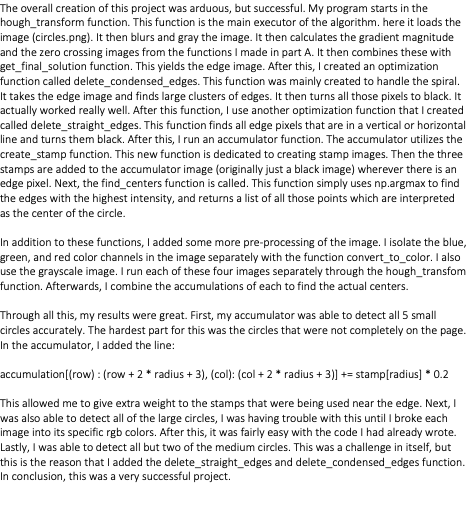